In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import mysql.connector

# Connect to your SQL database
conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Kashish@123",         
    database="Sales"     
)


# Query your cleaned table
#query = "SELECT * FROM supply_chain_data"

# Load into Pandas
#df = pd.read_sql(query, conn)

# Close connection
#conn.close()

# View data
#print(df.head())

In [5]:
# Query your cleaned table
query = "SELECT * FROM supply_chain"

In [7]:
# Load into Pandas
df = pd.read_sql(query, conn)


C:\Users\nakeeb khan\AppData\Local\Temp\ipykernel_12184\2891694648.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [9]:
# Close connection
conn.close()

In [11]:
# View data
print(df.head())

  product_type    sku  price  availability  number_of_products_sold  \
0     haircare   SKU0  69.81            55                      802   
1     skincare   SKU1  14.84            95                      736   
2     skincare  SKU10  15.71            11                      996   
3     skincare  SKU11  90.64            95                      960   
4     haircare  SKU12  71.21            41                      336   

   revenue_generated customer_demographics  stock_levels  lead_times  \
0            8662.00            non-binary            58           7   
1            7460.90                female            53          30   
2            2330.97            non-binary            51          13   
3            6099.94                female            46          23   
4            2873.74               unknown           100          30   

   order_quantities  ...  lead_time production_volumes  \
0                96  ...         29                215   
1                37  ...

In [13]:
print(df.shape)        # Rows & columns


(100, 25)


In [15]:
print(df.columns)      # Column names


Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs', 'Profit'],
      dtype='object')


In [17]:
print(df.info())       # Data types & nulls


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 
 14  location                 10

In [19]:
print(df.head())       # First 5 rows

  product_type    sku  price  availability  number_of_products_sold  \
0     haircare   SKU0  69.81            55                      802   
1     skincare   SKU1  14.84            95                      736   
2     skincare  SKU10  15.71            11                      996   
3     skincare  SKU11  90.64            95                      960   
4     haircare  SKU12  71.21            41                      336   

   revenue_generated customer_demographics  stock_levels  lead_times  \
0            8662.00            non-binary            58           7   
1            7460.90                female            53          30   
2            2330.97            non-binary            51          13   
3            6099.94                female            46          23   
4            2873.74               unknown           100          30   

   order_quantities  ...  lead_time production_volumes  \
0                96  ...         29                215   
1                37  ...

In [21]:
df.describe()   #Summary Stats

,price,availability,number_of_products_sold,revenue_generated,stock_levels,lead_times,order_quantities,shipping_times,shipping_costs,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,defect_rates,costs,Profit
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,49.462500,48.400000,460.990000,5776.048600,47.770000,15.960000,49.220000,5.750000,5.548200,17.080000,567.840000,14.77000,47.266400,2.277100,529.245700,5723.234000
std,31.168147,30.743317,303.780074,2732.841169,31.369372,8.785801,26.784429,2.724283,2.651879,8.846251,263.046861,8.91243,28.982778,1.461254,258.302082,2739.384841
min,1.700000,1.000000,8.000000,1061.620000,0.000000,1.000000,1.000000,1.000000,1.010000,1.000000,104.000000,1.00000,1.090000,0.020000,103.920000,1052.430000
25%,19.595000,22.750000,184.250000,2812.847500,16.750000,8.000000,26.000000,3.750000,3.542500,10.000000,352.000000,7.00000,22.985000,1.007500,318.780000,2751.795000
50%,51.240000,43.500000,392.500000,6006.350000,47.500000,17.000000,52.000000,6.000000,5.320000,18.000000,568.500000,14.00000,45.905000,2.140000,520.430000,5958.070000
75%,77.195000,75.000000,704.250000,8253.972500,73.000000,24.000000,71.250000,8.000000,7.602500,25.000000,797.000000,23.00000,68.617500,3.562500,763.080000,8178.862500
max,99.170000,100.000000,996.000000,9866.470000,100.000000,30.000000,96.000000,10.000000,9.930000,30.000000,985.000000,30.00000,99.470000,4.940000,997.410000,9847.500000


In [30]:
#Value Counts of Key Categorical Columns
df['product_type'].value_counts()


product_type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

In [32]:
df['supplier_name'].value_counts()


supplier_name
supplier 1    27
supplier 2    22
supplier 5    18
supplier 4    18
supplier 3    15
Name: count, dtype: int64

In [34]:
df['location'].value_counts()

location
kolkata      25
mumbai       22
chennai      20
bangalore    18
delhi        15
Name: count, dtype: int64

In [38]:
#1.Revenue vs Cost vs Profit Analysis

df[['revenue_generated', 'shipping_costs', 'manufacturing_costs', 'Profit']].describe()

,revenue_generated,shipping_costs,manufacturing_costs,Profit
count,100.000000,100.000000,100.000000,100.000000
mean,5776.048600,5.548200,47.266400,5723.234000
std,2732.841169,2.651879,28.982778,2739.384841
min,1061.620000,1.010000,1.090000,1052.430000
25%,2812.847500,3.542500,22.985000,2751.795000
50%,6006.350000,5.320000,45.905000,5958.070000
75%,8253.972500,7.602500,68.617500,8178.862500
max,9866.470000,9.930000,99.470000,9847.500000


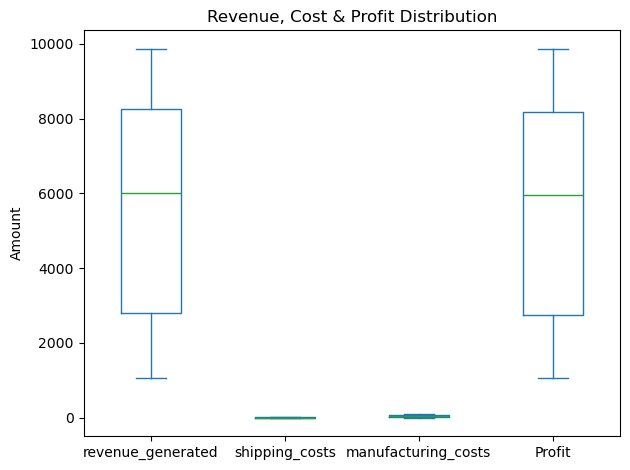

In [44]:
df[['revenue_generated', 'shipping_costs', 'manufacturing_costs', 'Profit']].plot(kind='box', title='Revenue, Cost & Profit Distribution')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [76]:
###2️. Top Performing Suppliers

top_suppliers = df.groupby('supplier_name')['revenue_generated'].sum().sort_values(ascending=False).head(10)

print(top_suppliers)

supplier_name
supplier 1    157528.98
supplier 2    125467.45
supplier 5    110343.48
supplier 3     97795.98
supplier 4     86468.97
Name: revenue_generated, dtype: float64


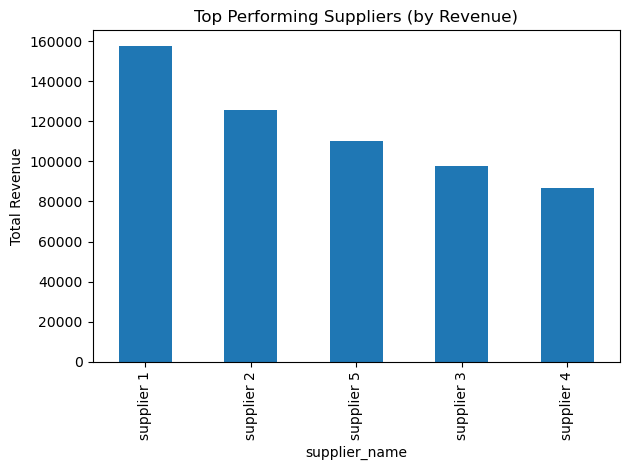

In [74]:
top_suppliers.plot(kind='bar', title='Top Performing Suppliers (by Revenue)')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

In [78]:
### 3. High-Cost Shipping Routes

shipping_by_location= df.groupby('location')['shipping_costs'].mean().sort_values(ascending=False).head(10)

print(shipping_by_location)

location
mumbai       6.248636
kolkata      5.761200
bangalore    5.748333
delhi        5.070667
chennai      4.689500
Name: shipping_costs, dtype: float64


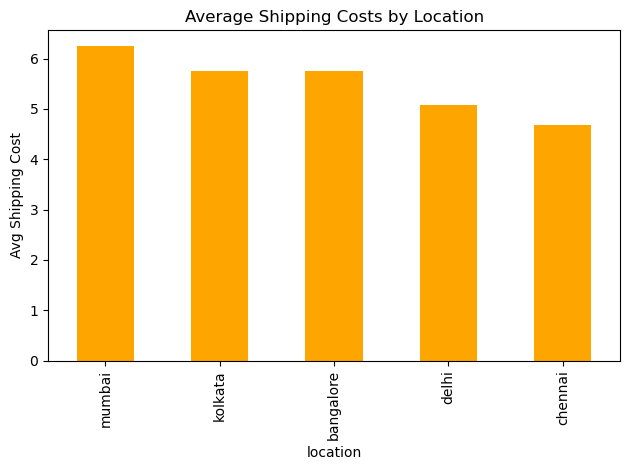

In [80]:
shipping_by_location.plot(kind='bar', title='Average Shipping Costs by Location', color='orange')
plt.ylabel('Avg Shipping Cost')
plt.tight_layout()
plt.show()

In [82]:
#### 4.Profitability by Product Type

profit_by_product = df.groupby('product_type')['Profit'].sum().sort_values(ascending=False)

print(profit_by_product)

product_type
skincare     239472.06
haircare     172606.99
cosmetics    160244.35
Name: Profit, dtype: float64


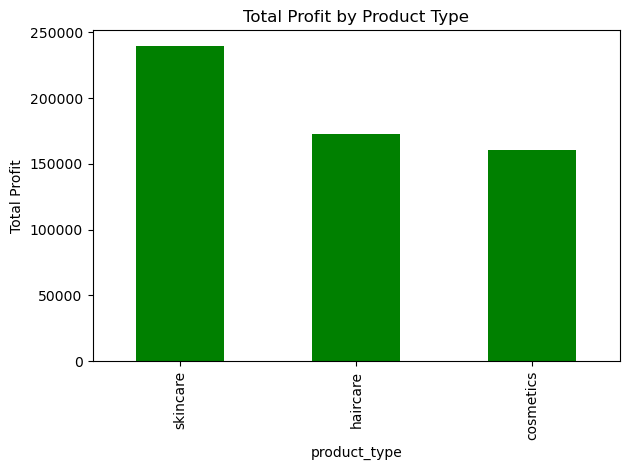

In [84]:
profit_by_product.plot(kind='bar', title='Total Profit by Product Type', color='green')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

In [86]:
### 5.Defect Rate Analysis

defect_by_product = df.groupby('product_type')['defect_rates'].mean().sort_values(ascending=False)

print(defect_by_product)

product_type
haircare     2.483824
skincare     2.334500
cosmetics    1.918462
Name: defect_rates, dtype: float64


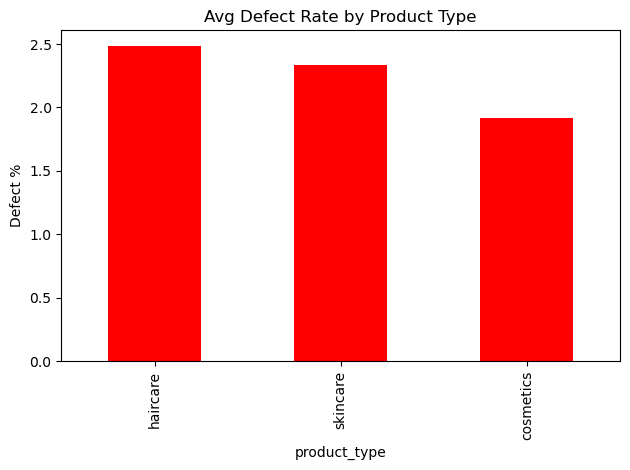

In [88]:
defect_by_product.plot(kind='bar', title='Avg Defect Rate by Product Type', color='red')
plt.ylabel('Defect %')
plt.tight_layout()
plt.show()

In [90]:
## 6. Top 10 High Revenue SKUs

top_skus = df.groupby('sku')['revenue_generated'].sum().sort_values(ascending=False).head(10)

print(top_skus)

sku
SKU51    9866.47
SKU38    9692.32
SKU31    9655.14
SKU90    9592.63
SKU2     9577.75
SKU32    9571.55
SKU67    9473.80
SKU88    9444.74
SKU52    9435.76
SKU18    9364.67
Name: revenue_generated, dtype: float64


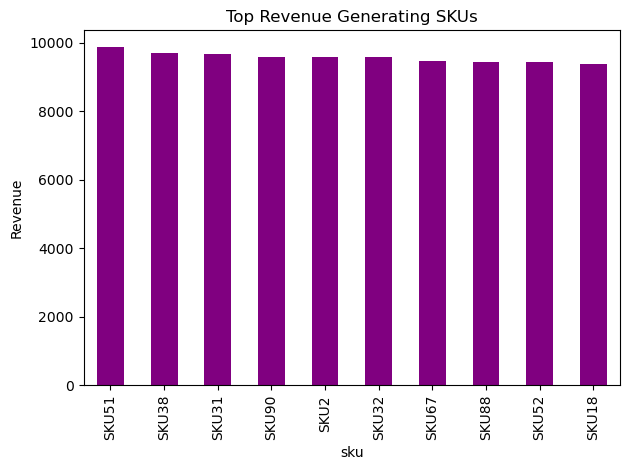

In [92]:
top_skus.plot(kind='bar', title='Top Revenue Generating SKUs', color='purple')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


In [98]:
### 7.Shipping Carrier Performance

carrier_costs = df.groupby('shipping_carriers')['shipping_costs'].mean().sort_values()

print(carrier_costs)

shipping_carriers
carrier b    5.509070
carrier a    5.555000
carrier c    5.599655
Name: shipping_costs, dtype: float64


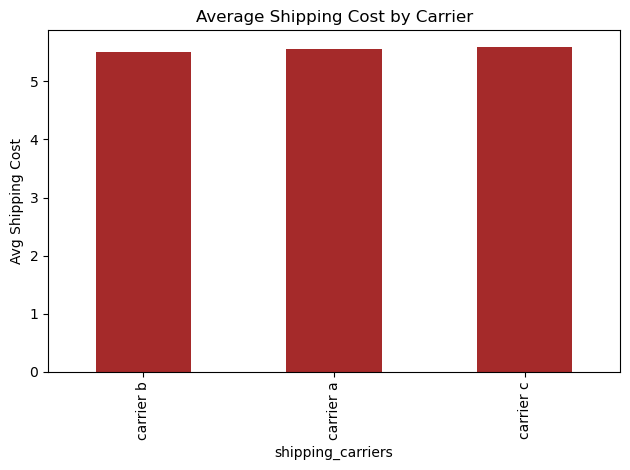

In [100]:
carrier_costs.plot(kind='bar', title='Average Shipping Cost by Carrier', color='brown')
plt.ylabel('Avg Shipping Cost')
plt.tight_layout()
plt.show()

In [68]:
### 8.Customer Demographics Insights

df['customer_demographics'].value_counts().head(10)

customer_demographics
unknown       31
female        25
non-binary    23
male          21
Name: count, dtype: int64

In [102]:
df.to_csv("cleaned_supply_chain_data.csv", index=False)